In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import multiprocessing as mp
from tqdm import tqdm
import tqdm as notebook_tqdm
import parmap

from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models.callbacks import CoherenceMetric
from gensim.models.callbacks import PerplexityMetric
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim

In [9]:
dataset_path = '../data/processing/stopWordsRemoved_total.feather'
df = pd.read_feather(dataset_path, use_threads=True)
df

,Query,News,Title,Text
0,더불어민주당,asiae,"[막대기, 당선, 판진, 중권, 네거티브, 민주당, 비판]","[진중권, 전동, 양대, 교수, 이미지, 출처, 연합뉴스, 원본, 아이콘, 아시아,..."
1,더불어민주당,asiae,"[공수, 민주당, 사죄, 국민의힘, 여론, 조사, 민심]","[이낙연, 분노, 실망, 아프, 반성, 혁신, 주호영, 여론, 조사, 차이, 민심,..."
2,더불어민주당,asiae,"[종합, 민주당, 오세훈, 내곡동, 특혜, 의혹, 거짓말, 거짓말, 맹공]","[박영선, 토론, 오세훈, 내곡동, 특혜, 의혹, 공세, 서울, 시장, 보궐, 선거..."
3,더불어민주당,asiae,"[박형준, 안민석, 더불어민주당, 원진, 보유, 튜버, 부산, 지검, 고발]","[국민의힘, 캠프, 부동산, 투기, 전혀, 의원, 후보, 부인, 부동산, 복부인, ..."
4,더불어민주당,asiae,"[포토, 더불어민주당, 원내, 대책, 회의]","[가장, 많이, 뉴스, 제공, 집계, 기준, 최대, 전기사, 제공]"
...,...,...,...,...
181819,더불어민주당,YTN,"[여론, 톡톡, 김기현, 책임, 확산, 이낙연, 이준석, 손잡]","[진행, 김영수, 앵커, 출연, 김형준, 배재, 석좌, 교수, 배종찬, 인사이트, ..."
181820,더불어민주당,YTN,"[홍익표, 특검, 본회, 국정, 조사, 연내, 처리]","[더불어민주당, 홍익표, 원내대표, 특검, 법안, 예산안, 본회의, 올리, 국정, ..."
181821,더불어민주당,YTN,"[손학규, 병립형, 회귀, 후퇴, 이재명, 약속]","[손학규, 미래, 대표, 선거제, 개편, 논의, 관련, 연동, 비례제, 더불어민주당..."
181822,더불어민주당,YTN,"[민주, 송영길, 구속영장, 청구, 검찰, 독재, 정권, 총선, 전략]","[더불어민주당, 검찰, 이전, 대회, 봉투, 의혹, 연루, 송영길, 대표, 구속, ..."


In [10]:
# Log 표시
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [15]:
processed_data = df['Text'].tolist()
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in df['Text']]
print(corpus[1])

2024-06-01 23:50:09,690 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-06-01 23:50:10,487 : INFO : adding document #10000 to Dictionary<43308 unique tokens: ['가운데', '갈등', '강조', '거듭', '겨냥']...>
2024-06-01 23:50:11,302 : INFO : adding document #20000 to Dictionary<58707 unique tokens: ['가운데', '갈등', '강조', '거듭', '겨냥']...>
2024-06-01 23:50:12,177 : INFO : adding document #30000 to Dictionary<67536 unique tokens: ['가운데', '갈등', '강조', '거듭', '겨냥']...>
2024-06-01 23:50:13,021 : INFO : adding document #40000 to Dictionary<73981 unique tokens: ['가운데', '갈등', '강조', '거듭', '겨냥']...>
2024-06-01 23:50:14,014 : INFO : adding document #50000 to Dictionary<80382 unique tokens: ['가운데', '갈등', '강조', '거듭', '겨냥']...>
2024-06-01 23:50:15,003 : INFO : adding document #60000 to Dictionary<85567 unique tokens: ['가운데', '갈등', '강조', '거듭', '겨냥']...>
2024-06-01 23:50:16,196 : INFO : adding document #70000 to Dictionary<93022 unique tokens: ['가운데', '갈등', '강조', '거듭', '겨냥']...>
2024-06-01 23:50:17,210 

[(2, 1), (6, 3), (14, 6), (15, 2), (16, 1), (18, 1), (21, 4), (33, 1), (35, 1), (38, 2), (41, 1), (45, 3), (51, 1), (57, 3), (59, 4), (60, 2), (64, 3), (66, 2), (67, 2), (74, 1), (78, 1), (83, 1), (85, 1), (98, 1), (102, 1), (105, 3), (109, 1), (112, 1), (120, 1), (124, 1), (127, 3), (128, 1), (129, 1), (130, 1), (131, 1), (132, 1), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 2), (139, 3), (140, 1), (141, 2), (142, 1), (143, 1), (144, 1), (145, 1), (146, 1), (147, 2), (148, 1), (149, 1), (150, 1), (151, 1), (152, 1), (153, 1), (154, 1), (155, 2), (156, 1), (157, 3), (158, 1), (159, 1), (160, 1), (161, 1), (162, 1), (163, 1), (164, 1), (165, 1), (166, 2), (167, 1), (168, 1), (169, 1), (170, 2), (171, 1), (172, 1), (173, 2), (174, 1), (175, 2), (176, 1), (177, 1), (178, 1), (179, 1), (180, 1), (181, 1), (182, 1), (183, 3), (184, 1), (185, 1), (186, 1), (187, 1), (188, 1), (189, 3), (190, 2), (191, 2), (192, 2), (193, 1), (194, 1), (195, 1), (196, 1), (197, 1), (198, 1), (199,

### 최적의 Topic수 찾기

In [40]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=mp.cpu_count()-1, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v', processes=mp.cpu_count())
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [41]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 40;
    start = 2;
    step = 6;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

  0%|          | 0/7 [00:00<?, ?it/s]2024-06-02 00:18:09,439 : INFO : using symmetric alpha at 0.5
2024-06-02 00:18:09,440 : INFO : using symmetric eta at 0.5
2024-06-02 00:18:09,450 : INFO : using serial LDA version on this node
2024-06-02 00:18:09,463 : INFO : running online LDA training, 2 topics, 1 passes over the supplied corpus of 181824 documents, updating every 38000 documents, evaluating every ~181824 documents, iterating 50x with a convergence threshold of 0.001000
2024-06-02 00:18:09,464 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-06-02 00:18:09,465 : INFO : training LDA model using 19 processes
2024-06-02 00:18:20,548 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/181824, outstanding queue size 1
2024-06-02 00:18:20,579 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/181824, outstanding queue size 2
2024-06-02 00:18:20,580 : INFO : PRO

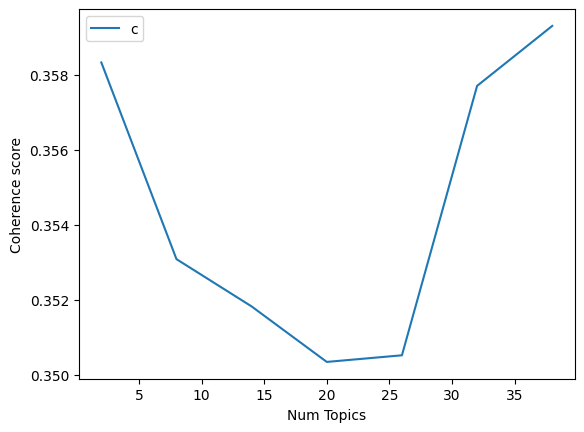

In [42]:
find_optimal_number_of_topics(dictionary, corpus, processed_data)

### LDA 학습

In [45]:
# LDA 모델 학습
lda_model = LdaMulticore(corpus, num_topics=20, id2word=dictionary, passes=20, random_state=42, workers=mp.cpu_count()-1)

2024-06-02 00:36:49,130 : INFO : using symmetric alpha at 0.05
2024-06-02 00:36:49,130 : INFO : using symmetric eta at 0.05
2024-06-02 00:36:49,139 : INFO : using serial LDA version on this node
2024-06-02 00:36:49,263 : INFO : running online LDA training, 20 topics, 20 passes over the supplied corpus of 181824 documents, updating every 38000 documents, evaluating every ~181824 documents, iterating 50x with a convergence threshold of 0.001000
2024-06-02 00:36:49,264 : INFO : training LDA model using 19 processes
2024-06-02 00:37:00,215 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/181824, outstanding queue size 1
2024-06-02 00:37:00,252 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/181824, outstanding queue size 2
2024-06-02 00:37:00,253 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/181824, outstanding queue size 3
2024-06-02 00:37:00,253 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/181

In [46]:
# 각 토픽의 상위 단어 출력
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

2024-06-02 00:42:12,560 : INFO : topic #0 (0.050): 0.014*"노동" + 0.012*"정부" + 0.012*"집회" + 0.012*"노조" + 0.011*"노동자" + 0.009*"기업" + 0.008*"안전" + 0.007*"처벌" + 0.006*"파업" + 0.005*"중대"
2024-06-02 00:42:12,562 : INFO : topic #1 (0.050): 0.026*"위원장" + 0.023*"언론" + 0.021*"방송" + 0.010*"위원회" + 0.009*"뉴스" + 0.008*"통신" + 0.007*"국회" + 0.007*"기자" + 0.007*"보도" + 0.007*"국민의힘"
2024-06-02 00:42:12,563 : INFO : topic #2 (0.050): 0.020*"의혹" + 0.016*"개발" + 0.015*"사업" + 0.009*"관련" + 0.008*"후보" + 0.008*"성남" + 0.007*"의원" + 0.007*"대장동" + 0.007*"공사" + 0.007*"조사"
2024-06-02 00:42:12,564 : INFO : topic #3 (0.050): 0.008*"여성" + 0.007*"청년" + 0.006*"교육" + 0.006*"사람" + 0.005*"사회" + 0.005*"학교" + 0.004*"교수" + 0.004*"사진" + 0.004*"학생" + 0.004*"한국"
2024-06-02 00:42:12,565 : INFO : topic #4 (0.050): 0.055*"후보" + 0.027*"선거" + 0.015*"민주당" + 0.014*"지역" + 0.012*"국민의힘" + 0.010*"대선" + 0.010*"이재명" + 0.009*"지사" + 0.009*"지방" + 0.009*"더불어민주당"
2024-06-02 00:42:12,566 : INFO : topic #5 (0.050): 0.042*"대표" + 0.040*"의원" + 0.028*"민주당" + 

Topic: 0 
Words: 0.014*"노동" + 0.012*"정부" + 0.012*"집회" + 0.012*"노조" + 0.011*"노동자" + 0.009*"기업" + 0.008*"안전" + 0.007*"처벌" + 0.006*"파업" + 0.005*"중대"
Topic: 1 
Words: 0.026*"위원장" + 0.023*"언론" + 0.021*"방송" + 0.010*"위원회" + 0.009*"뉴스" + 0.008*"통신" + 0.007*"국회" + 0.007*"기자" + 0.007*"보도" + 0.007*"국민의힘"
Topic: 2 
Words: 0.020*"의혹" + 0.016*"개발" + 0.015*"사업" + 0.009*"관련" + 0.008*"후보" + 0.008*"성남" + 0.007*"의원" + 0.007*"대장동" + 0.007*"공사" + 0.007*"조사"
Topic: 3 
Words: 0.008*"여성" + 0.007*"청년" + 0.006*"교육" + 0.006*"사람" + 0.005*"사회" + 0.005*"학교" + 0.004*"교수" + 0.004*"사진" + 0.004*"학생" + 0.004*"한국"
Topic: 4 
Words: 0.055*"후보" + 0.027*"선거" + 0.015*"민주당" + 0.014*"지역" + 0.012*"국민의힘" + 0.010*"대선" + 0.010*"이재명" + 0.009*"지사" + 0.009*"지방" + 0.009*"더불어민주당"
Topic: 5 
Words: 0.042*"대표" + 0.040*"의원" + 0.028*"민주당" + 0.015*"이재명" + 0.012*"비판" + 0.011*"더불어민주당" + 0.011*"국민" + 0.010*"정치" + 0.009*"국민의힘" + 0.008*"발언"
Topic: 6 
Words: 0.012*"대통령" + 0.012*"국민의힘" + 0.011*"뉴스" + 0.011*"제보" + 0.010*"경찰" + 0.010*"저작" + 0.010*"재재"

In [20]:
# 각 문서별 토픽 분포 확인
topics = [lda_model[doc] for doc in corpus]

In [22]:
topics

[[(0, 0.7772741), (1, 0.22272593)],
 [(0, 0.7010875), (1, 0.2989125)],
 [(0, 0.91898155), (1, 0.081018455)],
 [(0, 0.73315406), (1, 0.26684594)],
 [(0, 0.28354514), (1, 0.71645486)],
 [(0, 0.27345434), (1, 0.7265457)],
 [(0, 0.63677895), (1, 0.36322105)],
 [(1, 0.99020433)],
 [(0, 0.8211733), (1, 0.17882666)],
 [(0, 0.9083291), (1, 0.091670856)],
 [(0, 0.6911515), (1, 0.30884853)],
 [(0, 0.6121641), (1, 0.38783595)],
 [(0, 0.8407875), (1, 0.15921257)],
 [(0, 0.63152283), (1, 0.36847714)],
 [(0, 0.8345068), (1, 0.1654932)],
 [(0, 0.7917793), (1, 0.20822075)],
 [(0, 0.43205678), (1, 0.5679432)],
 [(0, 0.9029973), (1, 0.09700266)],
 [(0, 0.032961413), (1, 0.9670386)],
 [(0, 0.60479516), (1, 0.39520484)],
 [(0, 0.2687058), (1, 0.7312943)],
 [(0, 0.26698714), (1, 0.7330128)],
 [(0, 0.50555676), (1, 0.49444327)],
 [(0, 0.17477785), (1, 0.82522213)],
 [(0, 0.012096327), (1, 0.98790365)],
 [(0, 0.5337643), (1, 0.46623564)],
 [(0, 0.14096305), (1, 0.859037)],
 [(0, 0.15331914), (1, 0.8466808)],

In [47]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [ ]:
# 가장 높은 확률의 토픽으로 라벨링
def get_topic_label(topic_distribution):
    return max(topic_distribution, key=lambda x: x[1])[0]

data['Predicted_Label'] = [get_topic_label(doc) for doc in topics]
data['Predicted_Label'] = data['Predicted_Label'].apply(lambda x: '더불어민주당' if x == 0 else '국민의힘')

# 결과 확인
print(data[['Text', 'Predicted_Label']].head())

In [34]:
import transformers
from transformers import pipeline
import torch
from tqdm import tqdm

In [35]:
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

In [6]:
from huggingface_hub import notebook_login
notebook_login()

In [37]:
pipe = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device="cuda",
)

KeyboardInterrupt: 

In [38]:
# 4비트 양자화, 7GB의 메모리 사용

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
    device="cuda"
)

PackageNotFoundError: bitsandbytes

In [31]:
messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [18]:
terminators = [
    pipe.tokenizer.eos_token_id,
    pipe.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

In [19]:
outputs = pipe(
    messages,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

In [32]:
assistant_response = outputs[0]["generated_text"][-1]["content"]
print(assistant_response)

{'role': 'assistant', 'content': '네, 한국말을 할 줄 알아요.<'}
